## POSTTEST 8(DEEP LEARNING)

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## 1. REGRESSION-DNN

Deep learning merupakan subbidang machine learning yang algortimatnya
terinspirasi dari struktur syaraf manusia. Struktur tersebut dinamakan Artificial
Neural Network yang disingkat ANN. ANN memiliki kemampuan untuk belajar dan
beradaptasi sesuai informasi yang diberikan. Deep learning menggunakan level
hirarki jaringan saraf tiru yang dibuat seperti otak manusia dengan neuron nodes
terhubung seperti jaring.
Neuron-neuron dalam neural network disusun dalam grup yang disebut layer.
ANN terdiri dari 3 layer:
1. Input layer → berisi variabel data input
2. Hidden layer/processing layer → berisi Langkah pengenalan objek
3. Output layer → berisi hasil pengenalan suatu objek

Deep Neural Network (DNN) adalah salah satu algoritma dalam ANN.
Algoritma ini memiliki pengertian sebagai jaringan saraf tiru yang memiliki lebih dari
satu lapisan saraf tersebunyi. Pada modul ini kita akan membangun DNN
menggunakan Keras.

In [3]:
x = np.array([1,2,3,4,5,6],dtype = float)
y = np.array([2,3,4,8,10,12],dtype= float)

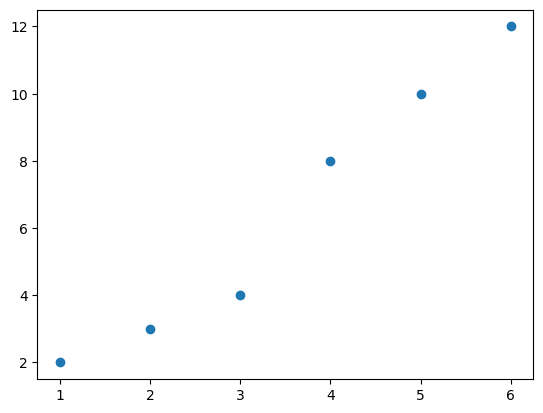

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [6]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])

In [7]:
model.compile(optimizer='adam', loss='mae')

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 1e-4):
            self.model.stop_training = True
            
cb = myCallback()

model.fit(x,y, epochs=500, steps_per_epoch=10, callbacks=cb)

Epoch 1/500
10/10 [==============================] - 0s 634us/step - loss: 6.3289
Epoch 2/500
10/10 [==============================] - 0s 0s/step - loss: 4.7754
Epoch 3/500
10/10 [==============================] - 0s 889us/step - loss: 5.8661
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 5.1252
Epoch 5/500
10/10 [==============================] - 0s 889us/step - loss: 5.9813
Epoch 6/500
10/10 [==============================] - 0s 889us/step - loss: 5.4903
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 5.4490
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 5.1664
Epoch 9/500
10/10 [==============================] - 0s 2ms/step - loss: 5.6084
Epoch 10/500
10/10 [==============================] - 0s 892us/step - loss: 5.4935
Epoch 11/500
10/10 [==============================] - 0s 889us/step - loss: 5.1144
Epoch 12/500
10/10 [==============================] - 0s 889us/step - loss: 5.2422
Epoch 13/500
10/10 [====

## 2. MNIST

MNIST Classification adalah hello world untuk machine learning. Tujuan dari MNIST Classfication adalah menggunakan input gambar, dan menentukan angka pada gambar tersebut.

MNIST dataset terdiri dari 70000 images dari angka yang ditulis dengan tangan. Dataset ini cocok digunakan untuk course, karena data cukup besar dan data sudah di preprocessing, sudah terbagi menjadi data training dan test.

In [10]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [11]:
print(y_train_raw[0])
print(x_train_raw.shape)
print(x_test_raw.shape)

5
(60000, 28, 28)
(10000, 28, 28)


In [12]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


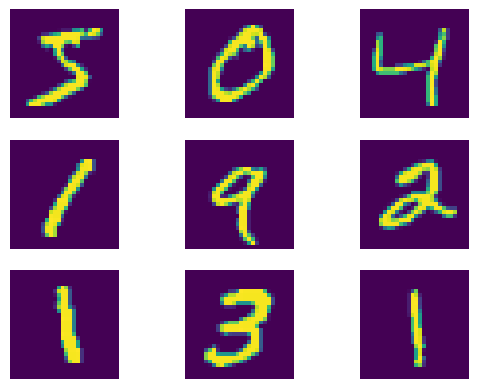

In [13]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [14]:
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [15]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=784),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(124, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 124)               31868     
                                                                 
 dense_5 (Dense)             (None, 128)               16000     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 582,406
Trainable params: 582,406
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=[x_test, y_test])

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2401 - accuracy: 0.9289 - val_loss: 0.1112 - val_accuracy: 0.9645
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0863 - accuracy: 0.9732 - val_loss: 0.0915 - val_accuracy: 0.9713
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0742 - val_accuracy: 0.9769
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.0846 - val_accuracy: 0.9738
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0343 - accuracy: 0.9885 - val_loss: 0.0798 - val_accuracy: 0.9773
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0710 - val_accuracy: 0.9810
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0683 - val_accuracy: 0.9828
Epoch 

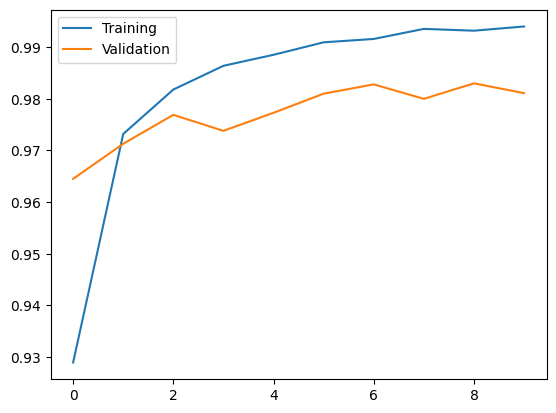

In [19]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9811


[0.07679447531700134, 0.9811000227928162]

In [21]:
model.save('model/model.h5')

In [22]:
model_saved = tf.keras.models.load_model('model/model.h5')
model_saved.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 124)               31868     
                                                                 
 dense_5 (Dense)             (None, 128)               16000     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 582,406
Trainable params: 582,406
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_saved.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9811


[0.07679447531700134, 0.9811000227928162]

In [24]:
hasil = model_saved.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
x_train.shape

(60000, 784)

In [26]:
np.unique(y_train_raw)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)